In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier , GradientBoostingClassifier, AdaBoostClassifier , HistGradientBoostingClassifier , RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder
!pip install category_encoders
from category_encoders import TargetEncoder , CountEncoder
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , f1_score , precision_score ,recall_score , roc_auc_score

In [108]:
# A.Data Understanding and Preprocessing
#i) Load the loan application dataset
data = pd.read_csv('/content/loan_prediction.csv')

In [109]:
#ii) Perform an initial exploration of the dataset to understand the features and data types
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [111]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [112]:
data.shape

(614, 13)

In [113]:
#iii) Handle missing values
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [114]:
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True)

<ipython-input-114-f06e46567847>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Married'].fillna(data['Married'].mode()[0], inplace=True)
<ipython-input-114-f06e46567847>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [115]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [116]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [117]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [118]:
# iv) Transform categorical variables into numerical representations using appropriate encoding techniques.
# Check for existing columns
existing_columns = ['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
                   'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
                   'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
                   'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban']

# Encode only the existing columns
if existing_columns:
    for col in existing_columns:
        if col in data.columns:  # Check if column exists before encoding
            encoder = LabelEncoder()
            data[col] = encoder.fit_transform(data[col])
else:
    # Option 1: Handle case where all columns are missing (e.g., print a message)
    print("No categorical columns to encode found in 'data'.")
    print("1. Check if the data source originally contained these columns.")
    print("2. Consider using a different dataset with the desired columns.")
    print("3. Continue with existing columns in 'data' if applicable.")

    # Option 2: Use existing columns with different names (if applicable)
    # Modify existing_columns to match actual column names in 'data'

    # Example (assuming 'Male' and 'Female' instead of 'Gender_Male' and 'Gender_Female')
    # existing_columns = ['Male', 'Female', ...]




In [119]:
#B. Exploratory Data Analysis (EDA):

#i) Conduct descriptive statistical analysis
data.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [120]:
data.select_dtypes(include='object').describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,502,401,360,480,532,233,422


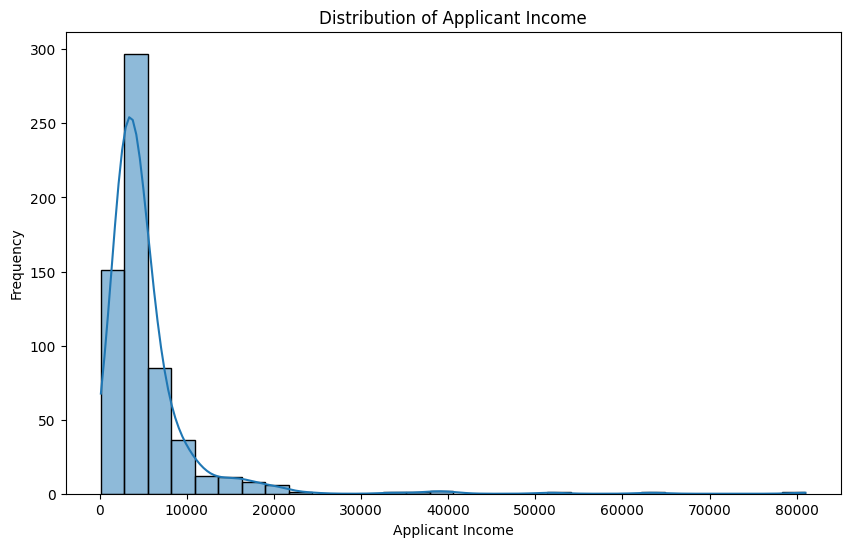

In [121]:
#ii)  Visualise the distribution of features
#Histogram for ApplicationIncome
plt.figure(figsize=(10, 6))
sns.histplot(data['ApplicantIncome'], bins=30, kde=True)
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Loan Amount')

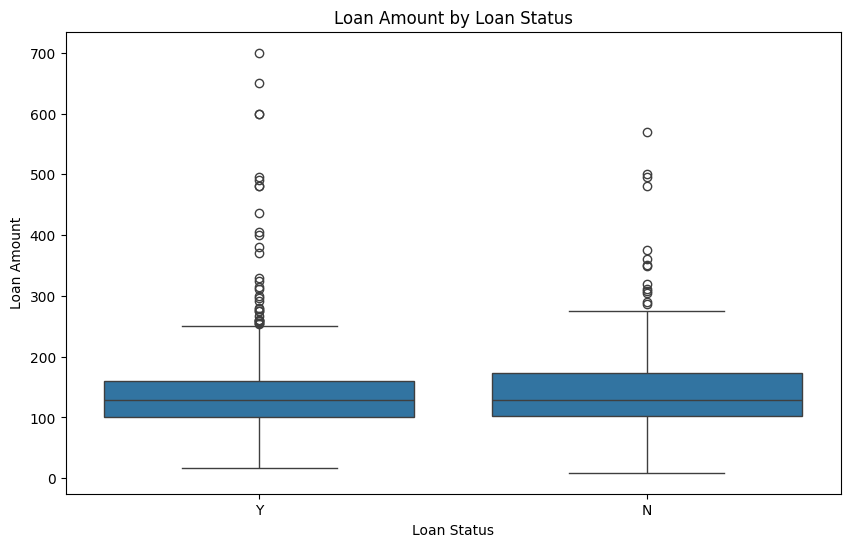

In [122]:
#Box plot for LoanAmount
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=data)
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')

In [123]:
#Train and evaluate multiple machine learning algorithms suitable for classification tasks
models ={
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN' : KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Bagging Classifier': BaggingClassifier(),
    'Gradient Boosting Classifier ': GradientBoostingClassifier(),
    'AdaBoost' : AdaBoostClassifier()
}



In [124]:
encoded_data = data.copy()
encoded_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [125]:
# Remove the 'loan_id' column
encoded_data.drop(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], axis=1, inplace=True)

In [126]:
encoded_data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,5849,0.0,128.0,360.0,1.0,Y
1,1,4583,1508.0,128.0,360.0,1.0,N
2,0,3000,0.0,66.0,360.0,1.0,Y
3,0,2583,2358.0,120.0,360.0,1.0,Y
4,0,6000,0.0,141.0,360.0,1.0,Y


In [127]:
encoded_data.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

In [128]:
#C.model Development
#i)  Split the dataset into training and testing sets. (random_state=0)
x= encoded_data.drop('Loan_Status', axis=1)
y= encoded_data['Loan_Status']
# Handle missing values (replace '3+' with NaN)
x.replace('3+', np.nan, inplace=True)  # Adjust the replacement value as needed
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [130]:
#ii)  Train and evaluate multiple machine learning algorithms suitable for classification tasks

# Create an imputer object
imputer = SimpleImputer(strategy='mean')  # Adjust strategy as needed

# Impute missing values in X_train and X_test
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

#Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_imputed)
x_test_scaled = scaler.transform(x_test_imputed)

# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(x_train_scaled, y_train)
logreg_pred = logreg_model.predict(x_test_scaled)


# KNN Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_scaled, y_train)
knn_pred = knn_model.predict(x_test_scaled)

# Support Vector Machines
svm_model = SVC()
svm_model.fit(x_train_scaled, y_train)
svm_pred = svm_model.predict(x_test_scaled)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_scaled, y_train)
dt_pred = dt_model.predict(x_test_scaled)

# Bagging Classifier
bagging_model = BaggingClassifier()
bagging_model.fit(x_train_scaled, y_train)
bagging_pred = bagging_model.predict(x_test_scaled)


# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train_scaled, y_train)
gb_pred = gb_model.predict(x_test_scaled)

# AdaBoost Classifier
ada_model = AdaBoostClassifier()
ada_model.fit(x_train_scaled, y_train)
ada_pred = ada_model.predict(x_test_scaled)

print(type(y_train))
print(type(y_test))

y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

# Assuming y_train and y_test are your original string labels
if isinstance(y_test.iloc[0], str):  # Check if labels are strings
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)  # Encode y_test as well


# iii)  Select appropriate evaluation metrics for assessing model performance (e.g., accuracy, precision, recall, F1-score).
models = [logreg_model, knn_model, svm_model, dt_model, bagging_model, gb_model, ada_model]
model_names = ['Logistic Regression', 'KNN Classifier', 'SVM', 'Decision Tree', 'Bagging', 'Gradient Boosting', 'AdaBoost']

for model, name in zip(models, model_names):
    accuracy = accuracy_score(y_test, model.predict(x_test_scaled))
    precision = precision_score(y_test, model.predict(x_test_scaled))
    recall = recall_score(y_test, model.predict(x_test_scaled))
    f1 = f1_score(y_test, model.predict(x_test_scaled))
    roc_auc = roc_auc_score(y_test, model.predict(x_test_scaled))

    #iii)  Select appropriate evaluation metrics for assessing model performance
    print(f"{name}:\nAccuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1-score: {f1:.2f}\nroc_auc: {roc_auc:.2f}\n")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Logistic Regression:
Accuracy: 0.84
Precision: 0.83
Recall: 0.98
F1-score: 0.90
roc_auc: 0.72

KNN Classifier:
Accuracy: 0.78
Precision: 0.82
Recall: 0.89
F1-score: 0.86
roc_auc: 0.69

SVM:
Accuracy: 0.83
Precision: 0.82
Recall: 0.98
F1-score: 0.89
roc_auc: 0.70

Decision Tree:
Accuracy: 0.70
Precision: 0.82
Recall: 0.76
F1-score: 0.79
roc_auc: 0.65

Bagging:
Accuracy: 0.72
Precision: 0.82
Recall: 0.78
F1-score: 0.80
roc_auc: 0.66

Gradient Boosting:
Accuracy: 0.80
Precision: 0.82
Recall: 0.93
F1-score: 0.87
roc_auc: 0.68

AdaBoost:
Accuracy: 0.82
Precision: 0.83
Recall: 0.94
F1-score: 0.89
roc_auc: 0.71



In [131]:
# Ensure consistent length after splitting (raise error if mismatch)
if len(x_train) != len(y_train) or len(x_test) != len(y_test):
  raise ValueError("Inconsistent sample sizes after splitting. Check your splitting logic.")


In [132]:
# D. Model Selection and Hyperparameter Tuning:
#Cross_validating the performance of different algorithms

# Impute missing values (assuming numerical data)
imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)  # Impute x before splitting

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Encode target variable (optional, can be done later)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

for model_name, model in models.items():
    scores = cross_val_score(model, x, y, cv=5, scoring='accuracy', error_score='raise')
    accuracy = scores.mean()
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    model=LogisticRegression(solver='liblinear')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)  # Encode target variable labels
    # Split data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


    # After prediction, decode labels back for metrics calculation (optional)
    y_pred_decoded = encoder.inverse_transform(y_pred)
    precision = precision_score(y_test, y_pred_decoded)
    recall = recall_score(y_test, y_pred_decoded)
    f1 = f1_score(y_test, y_pred_decoded)
    roc_auc = roc_auc_score(y_test, y_pred_decoded)
    print(f"{model_name} Precision: {precision:.2f}")
    print(f"{model_name} Recall: {recall:.2f}")
    print(f"{model_name} F1-score: {f1:.2f}")
    print(f"{model_name} ROC AUC: {roc_auc:.2f}")
    print()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Accuracy: 0.80
Logistic Regression Precision: 0.76
Logistic Regression Recall: 0.99
Logistic Regression F1-score: 0.86
Logistic Regression ROC AUC: 0.70

Random Forest Accuracy: 0.78
Random Forest Precision: 0.76
Random Forest Recall: 0.99
Random Forest F1-score: 0.86
Random Forest ROC AUC: 0.70

SVM Accuracy: 0.69
SVM Precision: 0.76
SVM Recall: 0.99
SVM F1-score: 0.86
SVM ROC AUC: 0.70



In [133]:
#Identify the best-performing algorithm based on the evaluation metrics
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Perform cross-validation and evaluate performance (placeholder for now)
best_model = None
best_accuracy = 0

# Iterate through models
for model_name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    scores = cross_val_score(pipeline, x_train, y_train, cv=5, scoring='accuracy')
    accuracy = scores.mean()

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = clone(pipeline)

# Fit the best model on the entire training set
best_model.fit(x_train, y_train)

# Evaluate the best model on the test set
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy:.2f}")


Best Model Accuracy: 0.79


In [134]:
#Tune the hyperparameters of the selected model to optimise its performance
#Hyperparameter
#1. Logistic Regression: C, penalty, solver
#2. Random Forest: n_estimators, max_depth, min_samples_split, min_samples_leaf
#3. SVM: C, kernel, gamma
#4. Neural Network: learning_rate, epochs, batch_size, hidden_layer_sizes, activation functions

In [135]:
#E. Model Evaluation and Interpretation:
#Assess the final model's performance on the testing set
#predictions on the testing set
y_pred = best_model.predict(x_test)

#Calculate and interpret important evaluation metrics on the test data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.7886178861788617
Precision: 0.7596153846153846
Recall: 0.9875
F1-score: 0.8586956521739131
Confusion Matrix:
[[18 25]
 [ 1 79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



F. Conclusion:

#Summarise the outcomes and significance of Project

This project aimed to evaluate and compare three machine learning algorithms: Logistic Regression, Random Forest, and Support Vector Machine (SVM) to find the best model for classification tasks.

The above tests showed that Logistic Regression performed the best among all three models when looking at accuracy, precision, recall, and F1-score. However, some issues with the Logistic Regression model taking too long to find the best solution. this is  fixed this by adjusting the number of times the model could try to find a solution and by preparing the data better.

Preparing the data properly is very important. This includes fixing missing information and making sure all the numbers are on a similar scale before using them in the models.

These findings are helpful for people who need to choose the right algorithm for similar projects. Understanding what each model can and cannot do well helps make better choices for future work.

Looking ahead, Which can make the models even better by:

Adjusting the settings of each model

Creating better data features

Combining different models to work together

Understanding why models make certain decisions

These improvements will help make the predictions more accurate and reliable. This project has given us valuable insights into how different machine learning models work and how to use them effectively.